# Importing Libraries

In [174]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from datetime import date, datetime

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import pickle

## Importing Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## Problem Statement.

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.


In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

We can create a predictive model that predicts if an insurance claim is fraudulent or not. 

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

We can see that there are no missing values in the dataset

In [5]:
data.drop(["_c39"],axis=1,inplace=True)
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Dropping column "_c39" since it has no data

In [130]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

## Data Wrangling

In [6]:
categorical_columns = ["policy_state","policy_csl", "policy_deductable",
"umbrella_limit", "insured_sex", "insured_education_level",
"insured_relationship", "insured_occupation","insured_hobbies",
"incident_date", "incident_type","collision_type",
"incident_severity", "authorities_contacted","incident_state", 
"incident_city", "incident_hour_of_the_day",
"number_of_vehicles_involved", "property_damage", "bodily_injuries",
"witnesses", "police_report_available", "auto_make", 
"auto_model", "auto_year", "fraud_reported"]

In [7]:
for column in categorical_columns:
    print (column," = ",data[column].unique(),"\n")

policy_state  =  ['OH' 'IN' 'IL'] 

policy_csl  =  ['250/500' '100/300' '500/1000'] 

policy_deductable  =  [1000 2000  500] 

umbrella_limit  =  [       0  5000000  6000000  4000000  3000000  8000000  7000000  9000000
 10000000 -1000000  2000000] 

insured_sex  =  ['MALE' 'FEMALE'] 

insured_education_level  =  ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD'] 

insured_relationship  =  ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family'] 

insured_occupation  =  ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing'] 

insured_hobbies  =  ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise'] 

incid

In [8]:
data["property_damage"] = data["property_damage"].replace("?",np.nan)
data["police_report_available"] = data["police_report_available"].replace("?",np.nan)
data["collision_type"] = data["collision_type"].replace("?",np.nan)

print(data["property_damage"].unique())
print(data["police_report_available"].unique())
print(data["collision_type"].unique())


['YES' nan 'NO']
['YES' nan 'NO']
['Side Collision' nan 'Rear Collision' 'Front Collision']


In [9]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [10]:
print(data["property_damage"].isnull().sum())
print(data["police_report_available"].isnull().sum())
print(data["collision_type"].isnull().sum())

360
343
178


In [11]:
for i in range(len(data["incident_location"])):
    data["incident_location"][i] = data["incident_location"][i][data["incident_location"][i].find(" "):]
data["incident_location"].nunique()

<ipython-input-11-fb6b480d79ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["incident_location"][i] = data["incident_location"][i][data["incident_location"][i].find(" "):]


156

In [12]:
categorical_columns.append("incident_location")

In [13]:
pb_date = []
for i in data["policy_bind_date"]:
        i = (datetime.strptime(i,'%d-%m-%Y'))
        pb_date.append(i.toordinal())
pb_date

[735523,
 732489,
 730369,
 726612,
 735390,
 732596,
 730275,
 726501,
 729060,
 734343,
 730996,
 729903,
 729348,
 734802,
 729751,
 727490,
 732105,
 731900,
 735595,
 727412,
 731026,
 732277,
 728075,
 726871,
 728691,
 735207,
 726730,
 731049,
 726506,
 735296,
 730168,
 733212,
 731428,
 727292,
 726845,
 733992,
 731283,
 727597,
 731179,
 729232,
 728421,
 734745,
 732431,
 731318,
 733015,
 732544,
 726475,
 726544,
 733048,
 729093,
 731590,
 728160,
 731003,
 728046,
 735462,
 732899,
 733366,
 728584,
 727702,
 732003,
 726512,
 727836,
 735394,
 733343,
 732790,
 727910,
 734366,
 726699,
 727970,
 727981,
 734364,
 729704,
 728631,
 731212,
 731686,
 730518,
 733784,
 727302,
 733913,
 735168,
 728213,
 729209,
 734183,
 728161,
 729159,
 728958,
 732374,
 726834,
 729981,
 727212,
 730095,
 727720,
 730396,
 734135,
 726543,
 734563,
 732347,
 735538,
 733575,
 730017,
 726759,
 728876,
 730642,
 732760,
 735172,
 727362,
 726747,
 727194,
 729704,
 733584,
 733418,
 

In [14]:
data["policy_bind_date"] = pb_date
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,735523,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,732489,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,730369,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,726612,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,735390,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,727029,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,735238,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,731263,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,734459,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [15]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [16]:
missing_data_columns = ["collision_type","property_damage","police_report_available"]

In [17]:
pd_mode = data["property_damage"].mode()
pra_mode = data["police_report_available"].mode()
ct_mode = data["collision_type"].mode()

print(pd_mode,"\n", pra_mode,"\n", ct_mode)

0    NO
dtype: object 
 0    NO
dtype: object 
 0    Rear Collision
dtype: object


#### Since the amount of missing data in these columns are quite large we will use classification models to predict these values. But first, we will complete the data analysis and engineer columns.

## Label Encoder

In [18]:
y1 = data["property_damage"]
y2 = data["police_report_available"]
y3 = data["collision_type"]

data_df = data.drop(["property_damage","police_report_available","collision_type"],axis=1)
data_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,735523,OH,250/500,1000,1406.91,0,466132,...,1,2,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,732489,IN,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,730369,OH,100/300,2000,1413.14,5000000,430632,...,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,726612,IL,250/500,2000,1415.74,6000000,608117,...,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,735390,IL,500/1000,1000,1583.91,6000000,610706,...,0,1,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,727029,OH,500/1000,1000,1310.80,0,431289,...,0,1,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,735238,IL,100/300,1000,1436.79,0,608177,...,2,3,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,731263,OH,250/500,500,1383.49,3000000,442797,...,2,3,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,734459,IL,500/1000,2000,1356.92,5000000,441714,...,0,1,46980,5220,5220,36540,Audi,A5,1998,N


In [19]:
le = LabelEncoder()

In [20]:
categorical_columns.remove("property_damage")
categorical_columns.remove("police_report_available")
categorical_columns.remove("collision_type")

In [21]:
data_le = data_df.copy()
for column in categorical_columns:
    data_le[column] = le.fit_transform(data_le[column])
data_le

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,735523,2,1,1,1406.91,1,466132,...,1,2,71610,6510,13020,52080,10,1,9,1
1,228,42,342868,732489,1,1,2,1197.22,5,468176,...,0,0,5070,780,780,3510,8,12,12,1
2,134,29,687698,730369,2,0,2,1413.14,5,430632,...,2,3,34650,7700,3850,23100,4,30,12,0
3,256,41,227811,726612,0,1,2,1415.74,6,608117,...,1,2,63400,6340,6340,50720,3,34,19,1
4,228,44,367455,735390,0,2,1,1583.91,6,610706,...,0,1,6500,1300,650,4550,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,727029,2,2,1,1310.80,1,431289,...,0,1,87200,17440,8720,61040,6,6,11,0
996,285,41,186934,735238,0,0,1,1436.79,1,608177,...,2,3,108480,18080,18080,72320,13,28,20,0
997,130,34,918516,731263,2,1,0,1383.49,3,442797,...,2,3,67500,7500,7500,52500,11,19,1,0
998,458,62,533940,734459,0,2,2,1356.92,5,441714,...,0,1,46980,5220,5220,36540,1,5,3,0


In [22]:
data_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int64  
 4   policy_state                 1000 non-null   int64  
 5   policy_csl                   1000 non-null   int64  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int64  
 11  insured_education_level      1000 non-null   int64  
 12  insured_occupation           1000 non-null   int64  
 13  insured_hobbies    

In [23]:
data_le.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,730889.195000,1.01400,0.951000,0.965000,1256.406150,1.900000,501214.488000,...,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,10.103000,0.247000
std,115.113174,9.140287,257063.005276,2687.464969,0.83096,0.804516,0.805247,244.167395,1.917205,71701.610941,...,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,726475.000000,0.00000,0.000000,0.000000,433.330000,0.000000,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,728555.000000,0.00000,0.000000,0.000000,1089.607500,1.000000,448404.500000,...,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,5.000000,0.000000
50%,199.500000,38.000000,533135.000000,730941.500000,1.00000,1.000000,1.000000,1257.200000,1.000000,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,10.000000,0.000000
75%,276.250000,44.000000,759099.750000,733153.500000,2.00000,2.000000,2.000000,1415.695000,1.000000,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,15.000000,0.000000
max,479.000000,64.000000,999435.000000,735651.000000,2.00000,2.000000,2.000000,2047.590000,10.000000,620962.000000,...,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,20.000000,1.000000


In [24]:
y1.unique()

array(['YES', nan, 'NO'], dtype=object)

In [25]:
y1 = y1.replace("YES",1)
y1 = y1.replace("NO",0)
y1

0      1.0
1      NaN
2      0.0
3      NaN
4      0.0
      ... 
995    1.0
996    1.0
997    NaN
998    NaN
999    NaN
Name: property_damage, Length: 1000, dtype: float64

In [26]:
y2.unique()

array(['YES', nan, 'NO'], dtype=object)

In [27]:
y2 = y2.replace("YES",1)
y2 = y2.replace("NO",0)
y2

0      1.0
1      NaN
2      0.0
3      0.0
4      0.0
      ... 
995    NaN
996    NaN
997    1.0
998    1.0
999    NaN
Name: police_report_available, Length: 1000, dtype: float64

In [28]:
y3.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [29]:
y3 = y3.replace("Side Collision",0)
y3 = y3.replace("Rear Collision",1)
y3 = y3.replace("Front Collision",2)
y3

0      0.0
1      NaN
2      1.0
3      2.0
4      NaN
      ... 
995    2.0
996    1.0
997    0.0
998    1.0
999    NaN
Name: collision_type, Length: 1000, dtype: float64

## Univariate Analysis

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


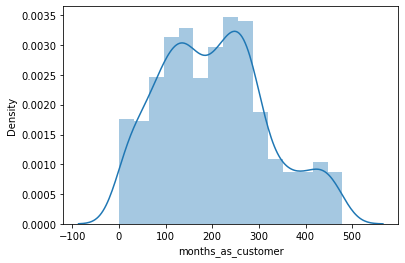

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


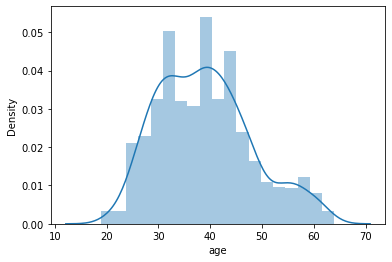

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


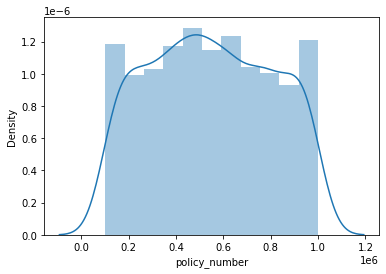

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


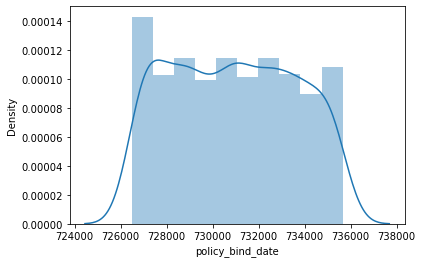

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


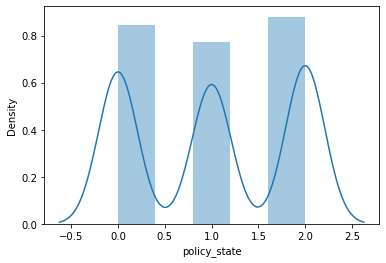

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


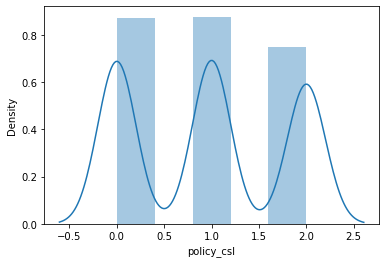

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


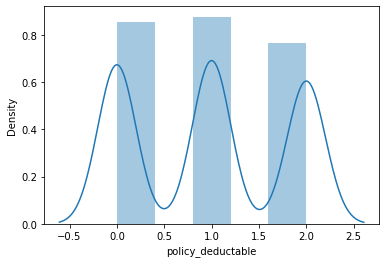

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


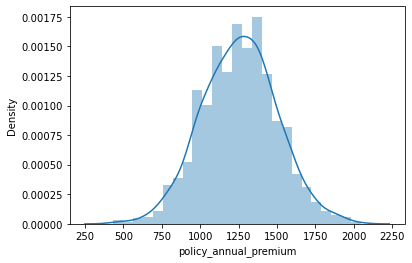

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


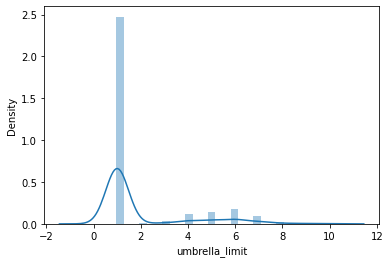

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


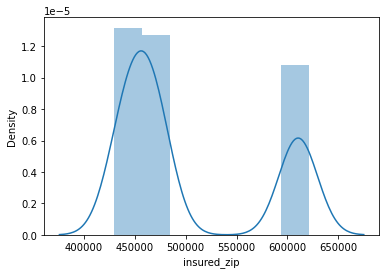

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


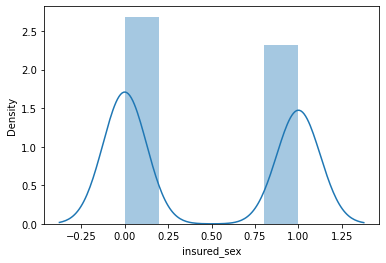

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


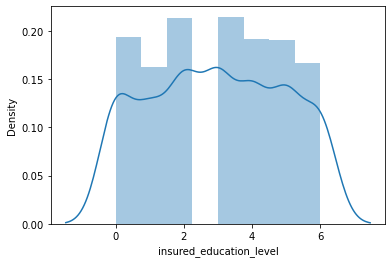

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


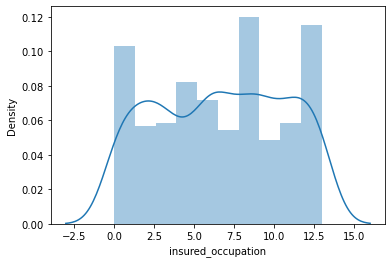

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


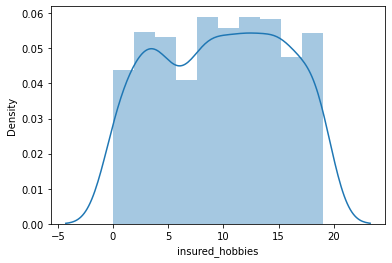

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


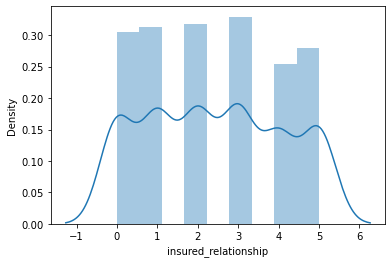

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


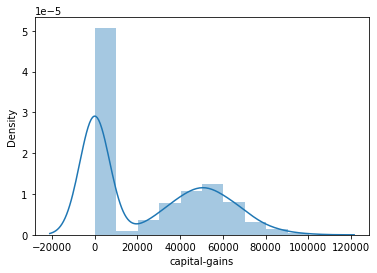

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


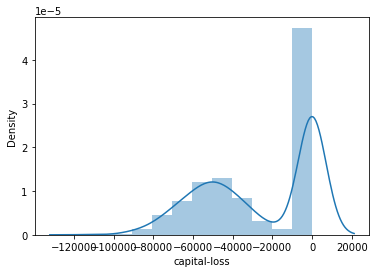

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


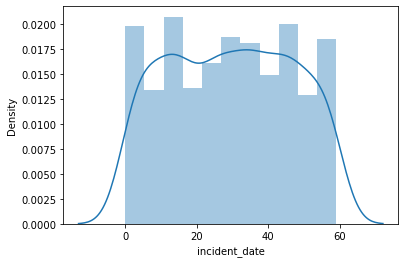

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


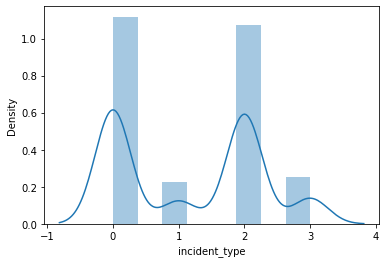

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


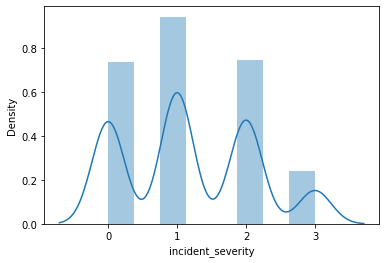

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


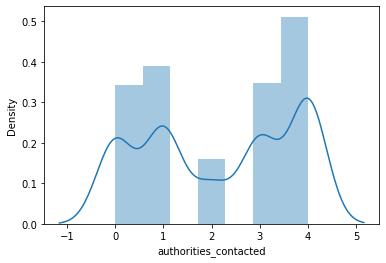

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


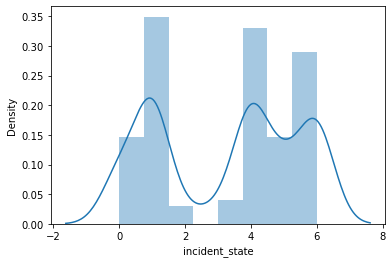

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


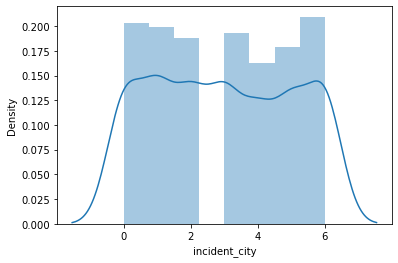

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


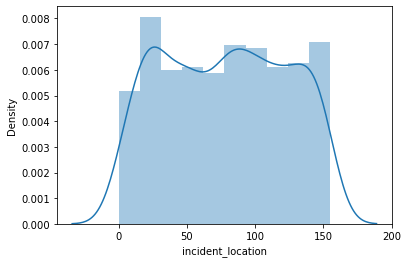

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


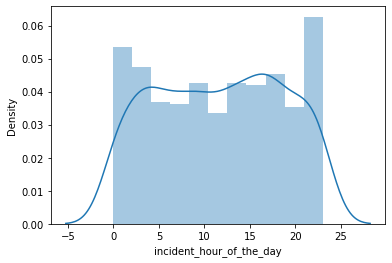

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


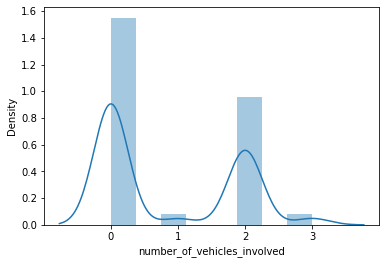

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


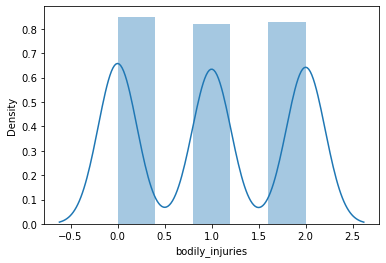

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


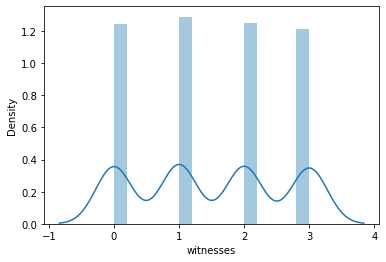

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


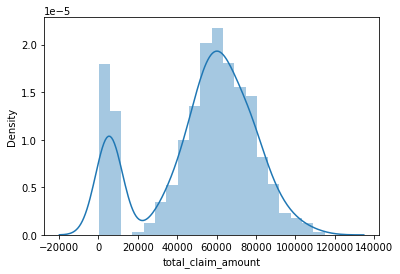

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


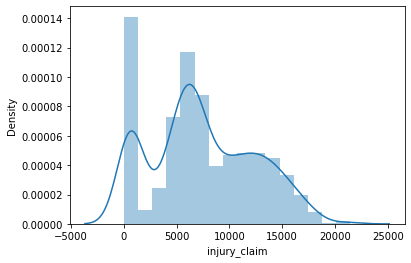

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


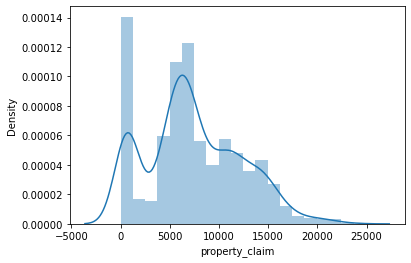

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


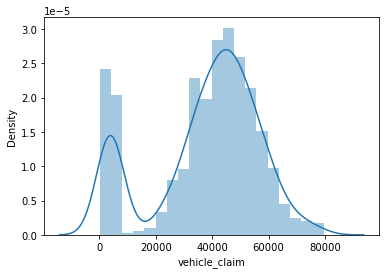

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


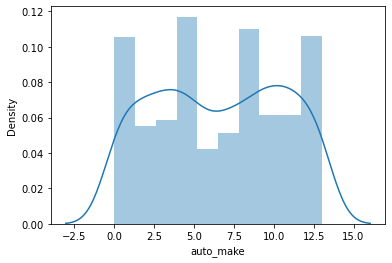

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


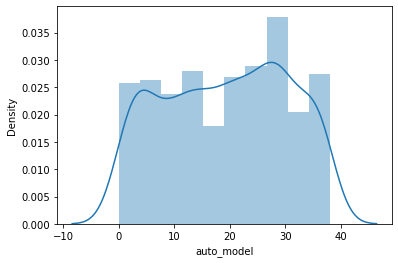

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


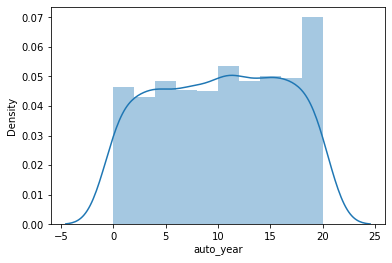

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


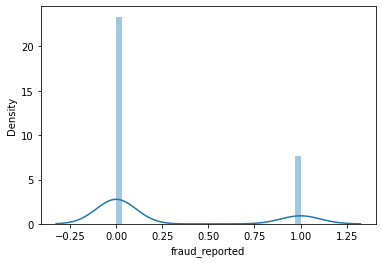

In [31]:
for column in data_le.columns:
    sns.distplot(data_le[column])
    plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


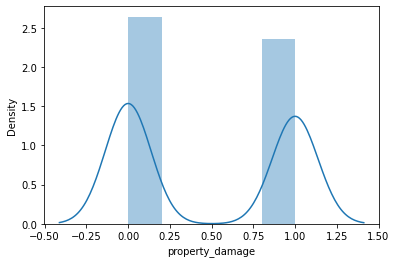

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


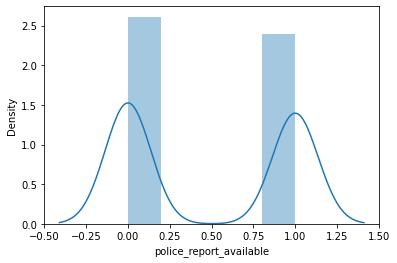

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


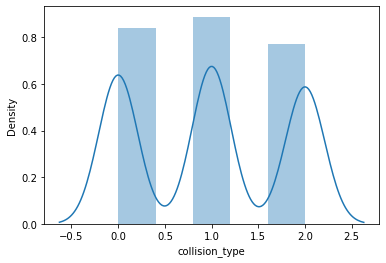

In [32]:
sns.distplot(y1)
plt.show()
sns.distplot(y2)
plt.show()
sns.distplot(y3)
plt.show()


/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


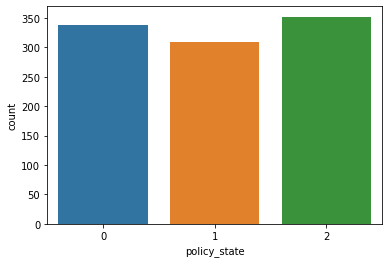

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


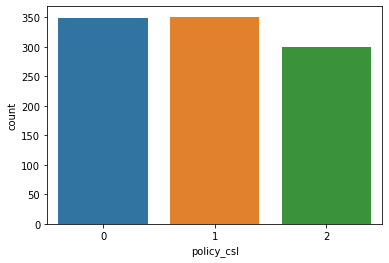

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


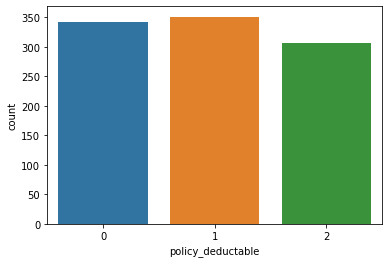

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


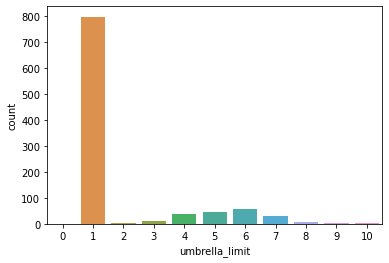

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


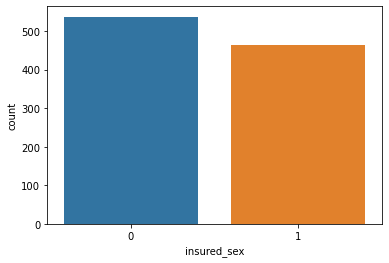

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


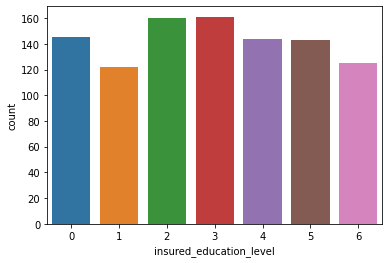

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


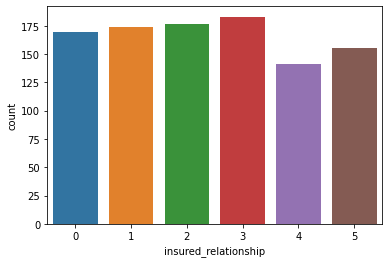

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


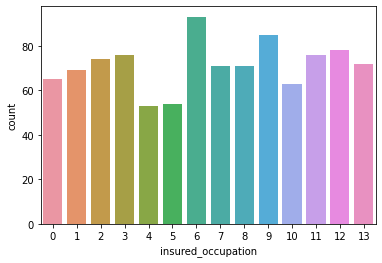

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


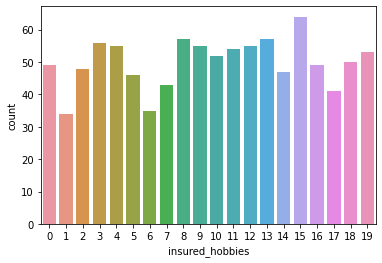

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


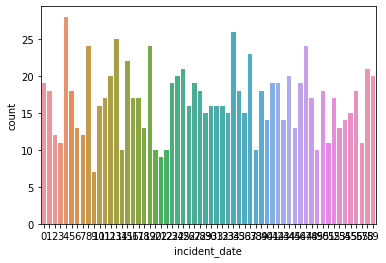

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


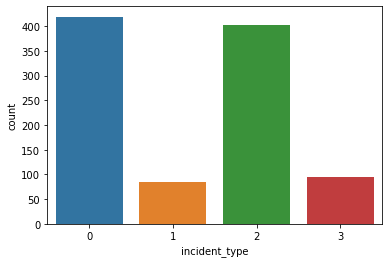

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


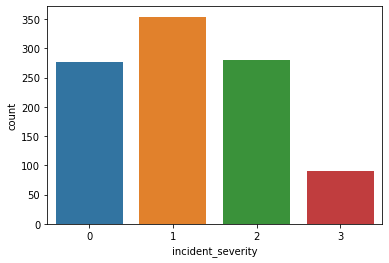

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


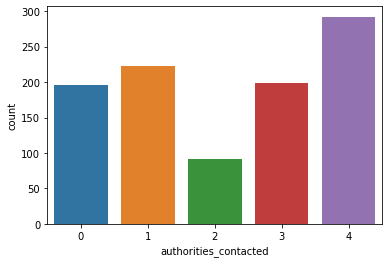

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


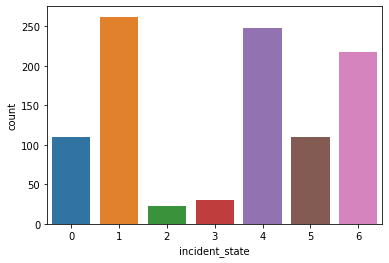

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


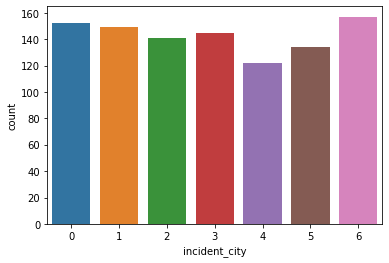

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


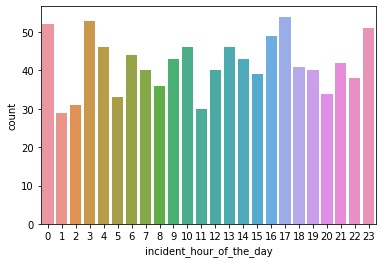

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


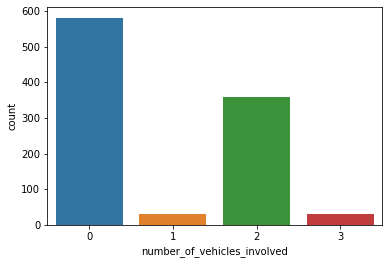

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


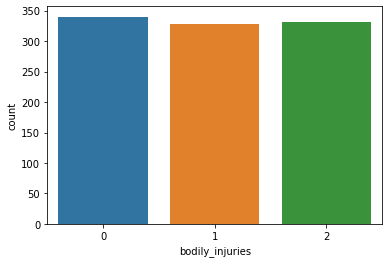

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


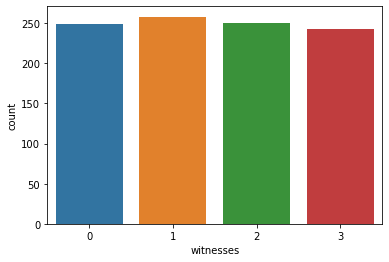

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


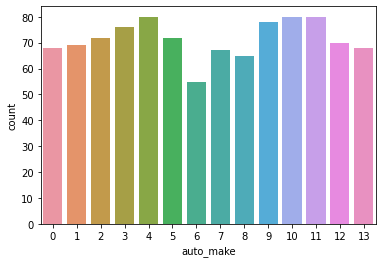

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


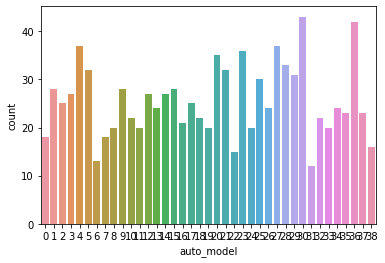

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


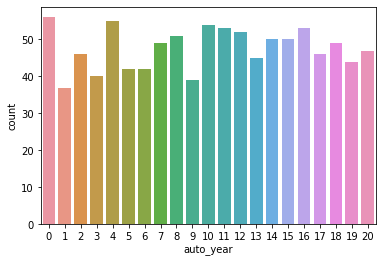

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


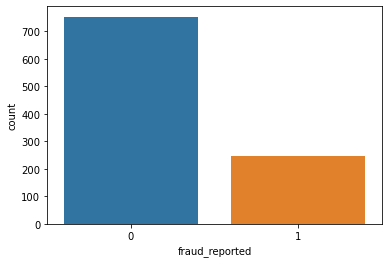

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


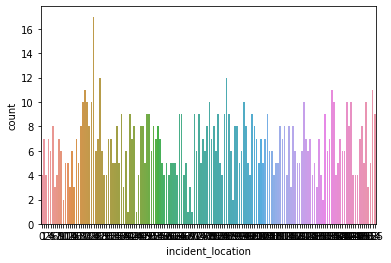

In [33]:
for column in categorical_columns:
    sns.countplot(data_le[column])
    plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


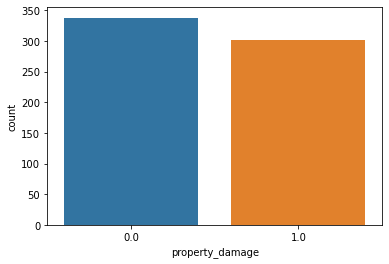

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


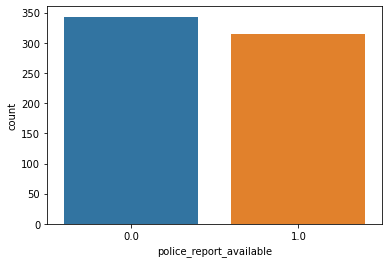

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


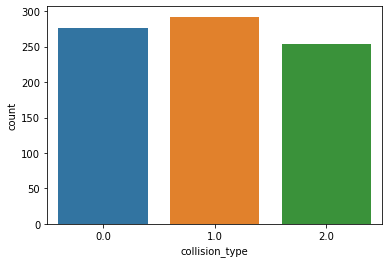

In [34]:
sns.countplot(y1)
plt.show()
sns.countplot(y2)
plt.show()
sns.countplot(y3)
plt.show()


/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


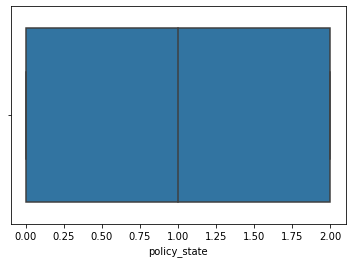

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


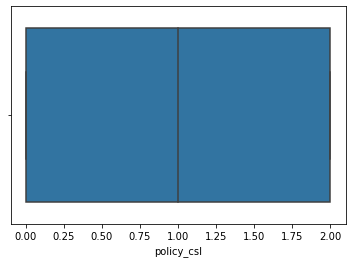

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


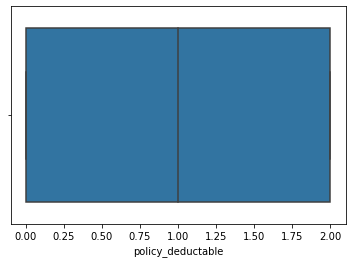

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


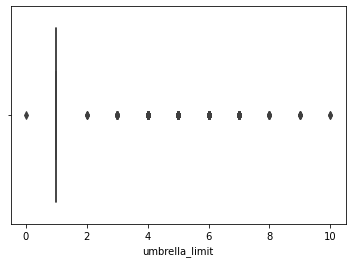

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


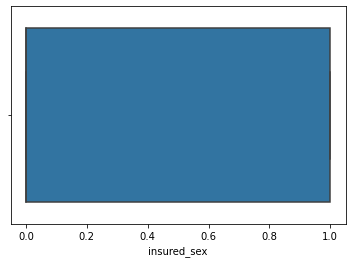

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


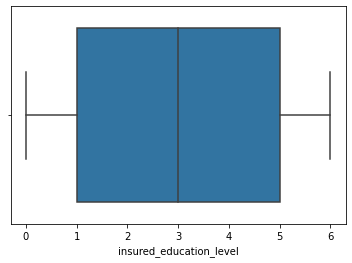

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


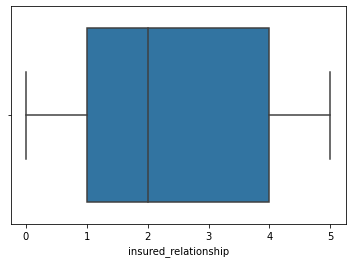

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


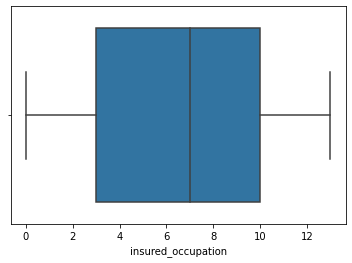

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


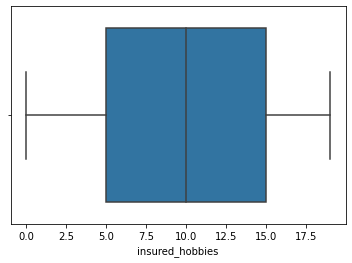

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


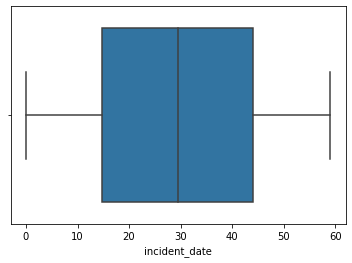

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


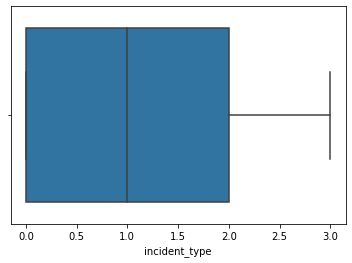

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


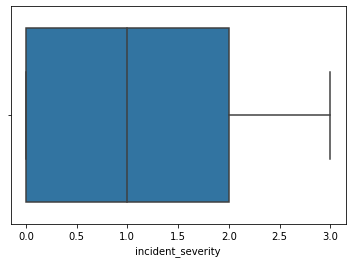

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


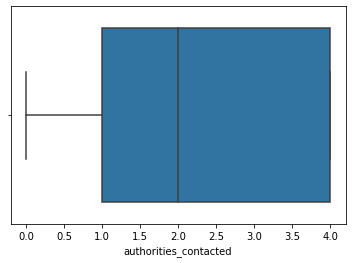

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


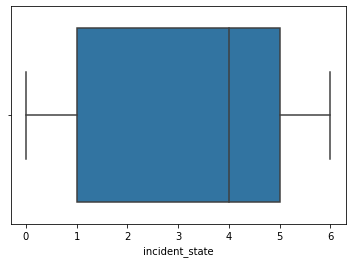

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


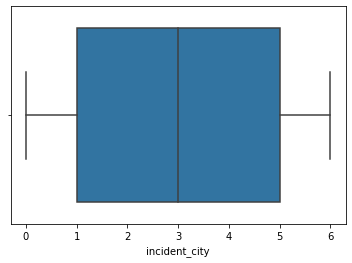

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


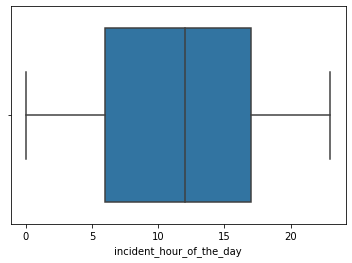

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


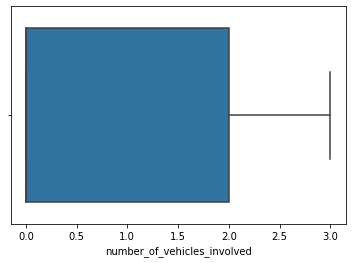

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


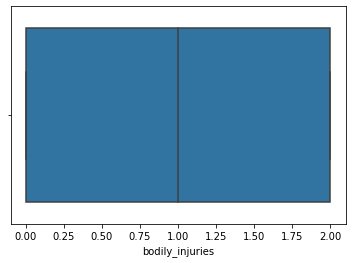

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


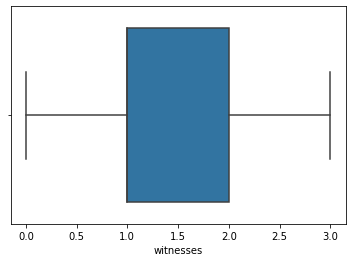

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


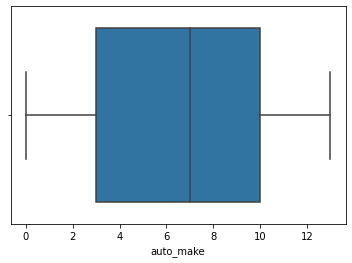

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


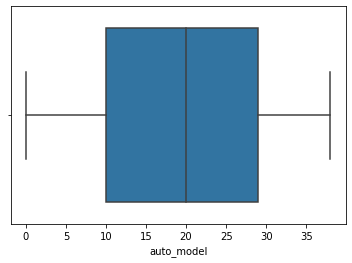

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


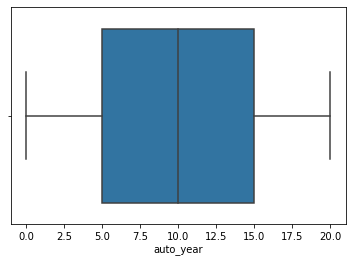

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


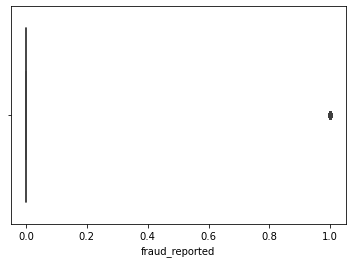

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


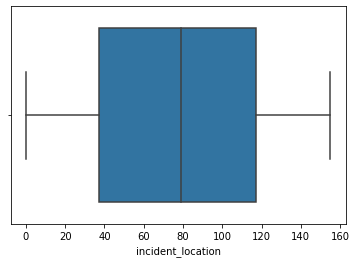

In [35]:
for column in categorical_columns:
    sns.boxplot(data_le[column])
    plt.show()

columns fraud reported and umbrella limit has outliers and therefore including these columns in our model can decrease the accuracy of our model.

Note that column fraud reported is the target variable therefore, it will be included in our funal model to do predictions. Although while making predictions for missing values we can remove this column

## Imputing missing Categorical values and checking if missing value column has correlation with our target

In [36]:
y1 = y1.fillna(99)
y1

0       1.0
1      99.0
2       0.0
3      99.0
4       0.0
       ... 
995     1.0
996     1.0
997    99.0
998    99.0
999    99.0
Name: property_damage, Length: 1000, dtype: float64

In [37]:
y2 = y2.fillna(99)
y2

0       1.0
1      99.0
2       0.0
3       0.0
4       0.0
       ... 
995    99.0
996    99.0
997     1.0
998     1.0
999    99.0
Name: police_report_available, Length: 1000, dtype: float64

In [38]:
y3 = y3.fillna(99)
y3

0       0.0
1      99.0
2       1.0
3       2.0
4      99.0
       ... 
995     2.0
996     1.0
997     0.0
998     1.0
999    99.0
Name: collision_type, Length: 1000, dtype: float64

In [39]:
data_le["y1"] = y1
data_le["y2"] = y2
data_le["y3"] = y3
data_le

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,y1,y2,y3
0,328,48,521585,735523,2,1,1,1406.91,1,466132,...,6510,13020,52080,10,1,9,1,1.0,1.0,0.0
1,228,42,342868,732489,1,1,2,1197.22,5,468176,...,780,780,3510,8,12,12,1,99.0,99.0,99.0
2,134,29,687698,730369,2,0,2,1413.14,5,430632,...,7700,3850,23100,4,30,12,0,0.0,0.0,1.0
3,256,41,227811,726612,0,1,2,1415.74,6,608117,...,6340,6340,50720,3,34,19,1,99.0,0.0,2.0
4,228,44,367455,735390,0,2,1,1583.91,6,610706,...,1300,650,4550,0,31,14,0,0.0,0.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,727029,2,2,1,1310.80,1,431289,...,17440,8720,61040,6,6,11,0,1.0,99.0,2.0
996,285,41,186934,735238,0,0,1,1436.79,1,608177,...,18080,18080,72320,13,28,20,0,1.0,99.0,1.0
997,130,34,918516,731263,2,1,0,1383.49,3,442797,...,7500,7500,52500,11,19,1,0,99.0,1.0,0.0
998,458,62,533940,734459,0,2,2,1356.92,5,441714,...,5220,5220,36540,1,5,3,0,99.0,1.0,1.0


In [40]:
corr_matrix = data_le.corr()
corr_matrix

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,y1,y2,y3
months_as_customer,1.000000,0.922098,0.057555,-0.048173,-0.000328,-0.026819,0.018481,0.005018,0.017800,0.017895,...,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,-0.006632,-0.052232,-0.043030
age,0.922098,1.000000,0.059413,-0.036941,-0.014533,-0.015185,0.020561,0.014404,0.021924,0.025604,...,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,-0.000785,-0.045421,-0.044510
policy_number,0.057555,0.059413,1.000000,-0.040104,0.072815,0.038917,-0.015058,0.022566,0.011052,0.007083,...,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,-0.028812,-0.023950,0.015509
policy_bind_date,-0.048173,-0.036941,-0.040104,1.000000,-0.005395,-0.017295,-0.052693,0.001027,0.043256,-0.000210,...,0.002270,-0.000009,0.000068,-0.005382,0.025558,0.014101,-0.001254,-0.002358,0.002621,-0.035040
policy_state,-0.000328,-0.014533,0.072815,-0.005395,1.000000,0.001027,0.008213,0.012455,-0.031793,0.008777,...,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,-0.022866,-0.054879,0.000581
policy_csl,-0.026819,-0.015185,0.038917,-0.017295,0.001027,1.000000,0.001986,0.023978,0.022779,0.006879,...,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,0.019620,-0.005789,0.070188
policy_deductable,0.018481,0.020561,-0.015058,-0.052693,0.008213,0.001986,1.000000,0.001624,0.009402,-0.001064,...,0.034352,0.055172,0.000502,-0.030775,-0.003892,0.024921,0.007620,-0.016499,-0.012738,-0.001565
policy_annual_premium,0.005018,0.014404,0.022566,0.001027,0.012455,0.023978,0.001624,1.000000,-0.007334,0.032354,...,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.083617,-0.001530,-0.016961
umbrella_limit,0.017800,0.021924,0.011052,0.043256,-0.031793,0.022779,0.009402,-0.007334,1.000000,0.022119,...,-0.045625,-0.024954,-0.039004,-0.007169,0.042421,0.010528,0.057719,0.022214,0.052933,0.047299
insured_zip,0.017895,0.025604,0.007083,-0.000210,0.008777,0.006879,-0.001064,0.032354,0.022119,1.000000,...,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,-0.079346,0.039954,0.047224


## Bivariate Analysis

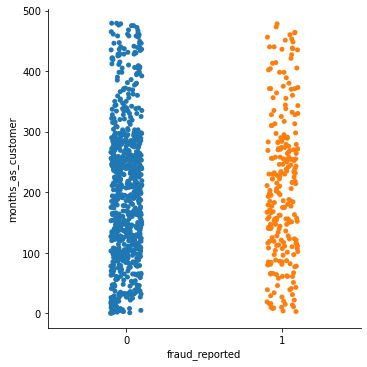

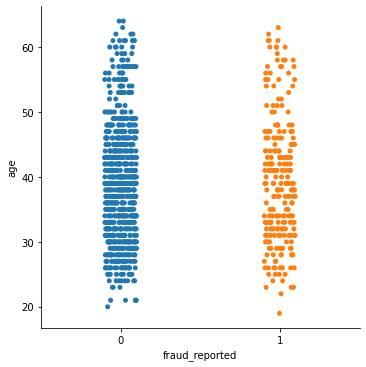

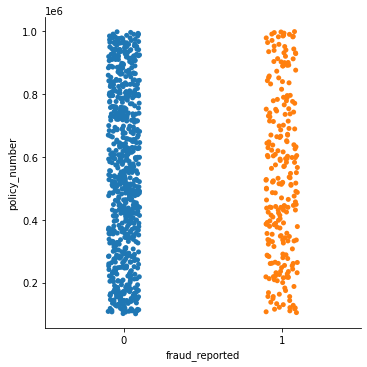

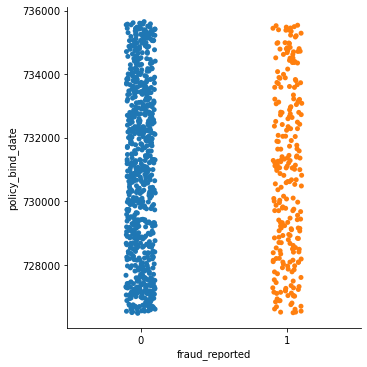

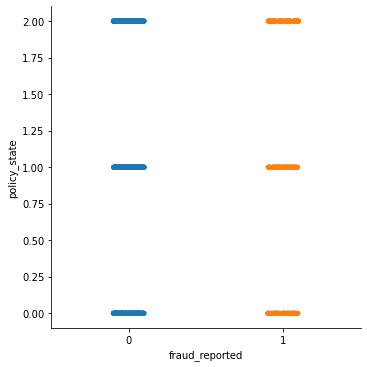

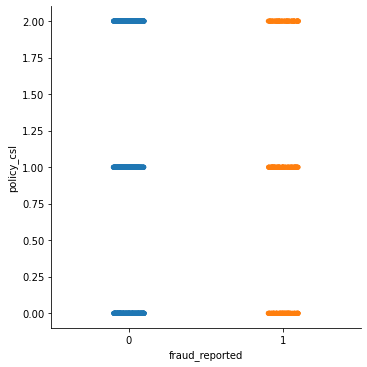

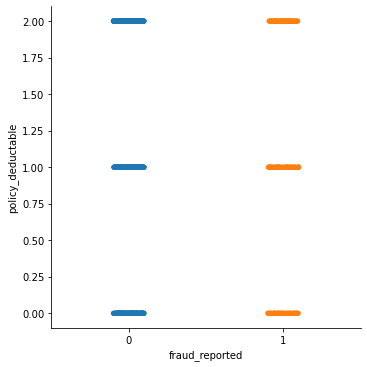

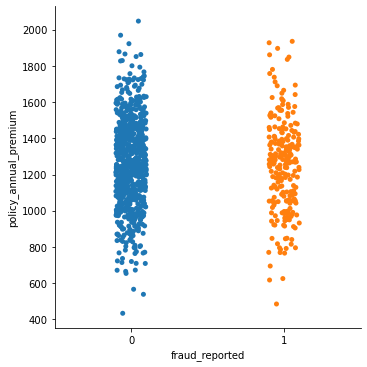

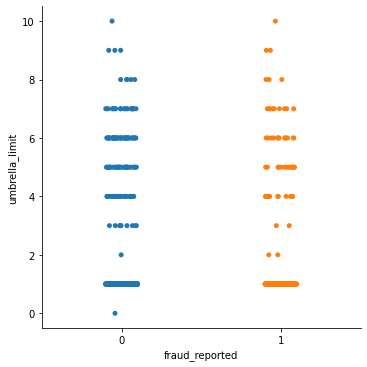

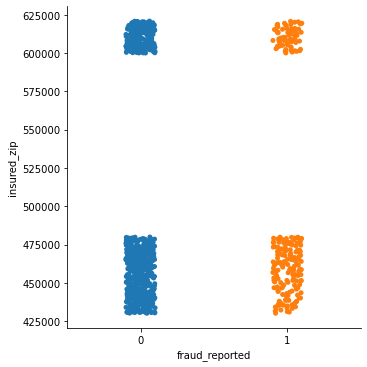

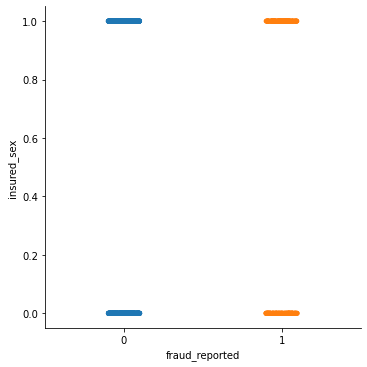

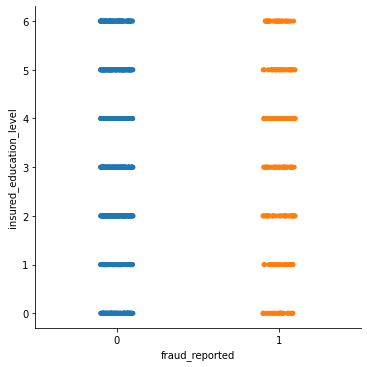

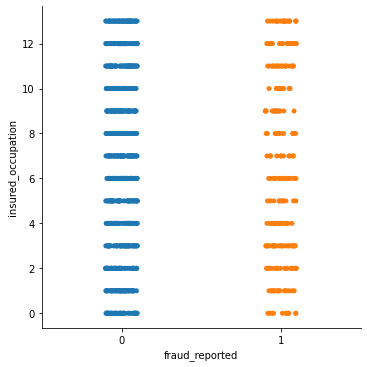

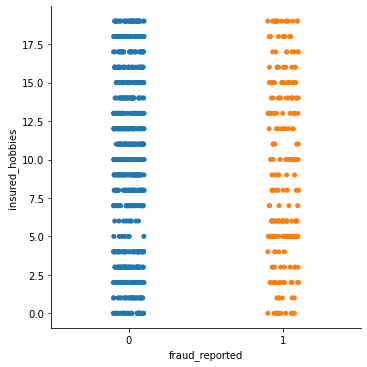

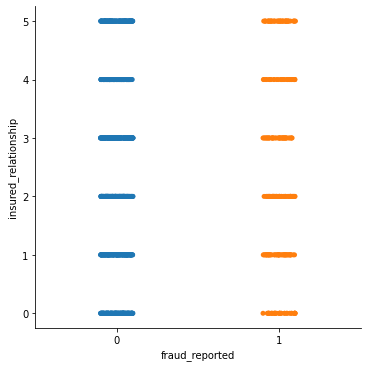

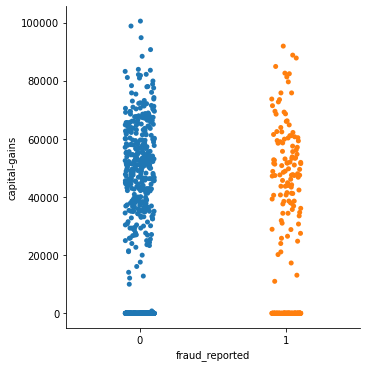

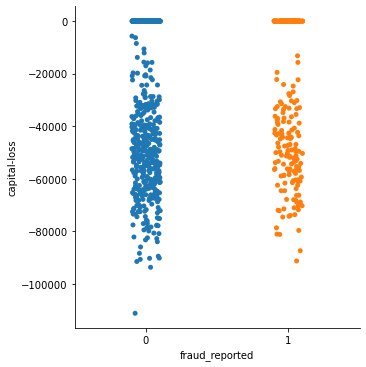

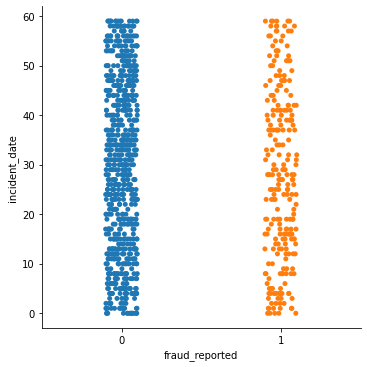

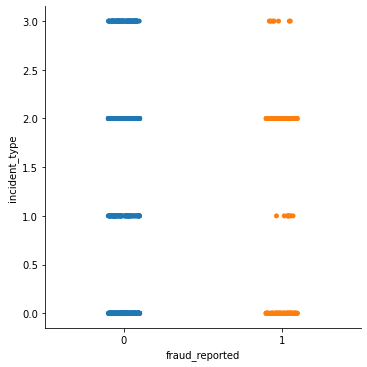

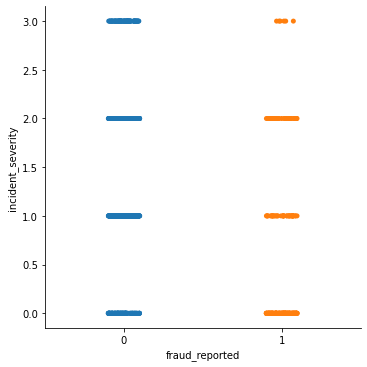

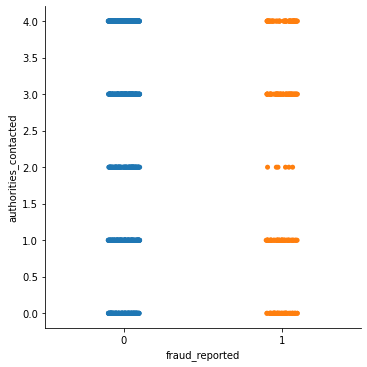

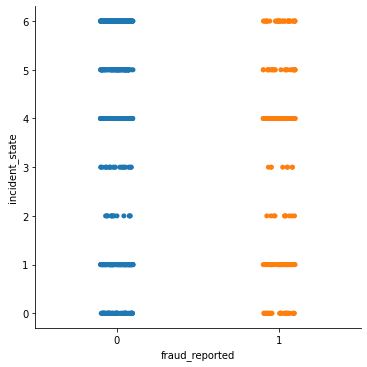

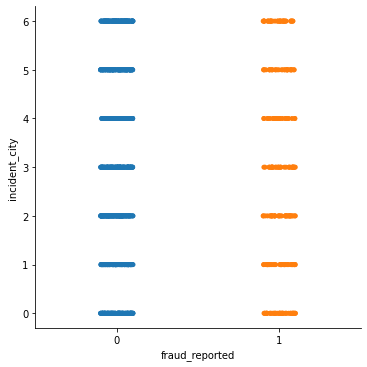

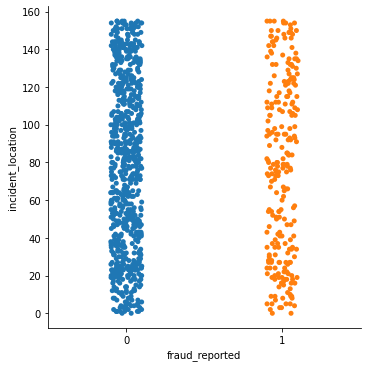

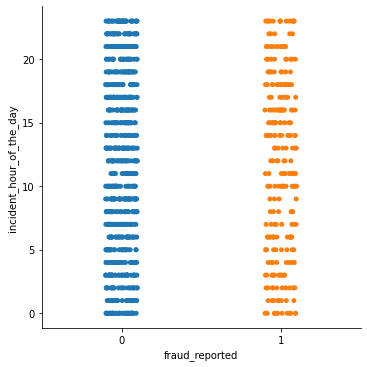

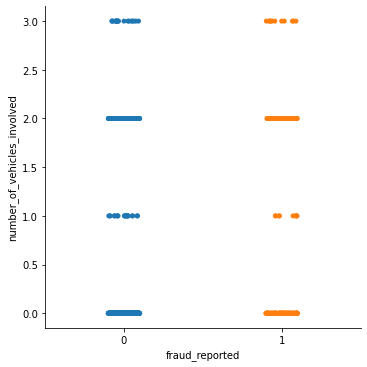

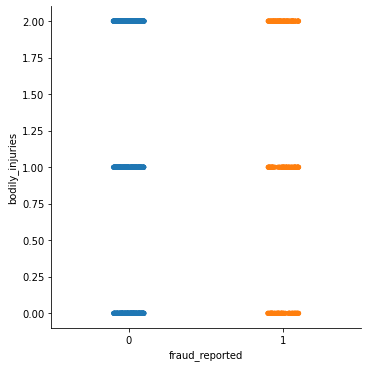

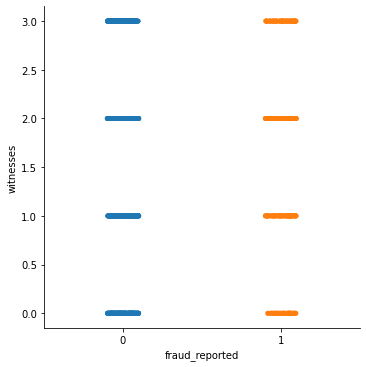

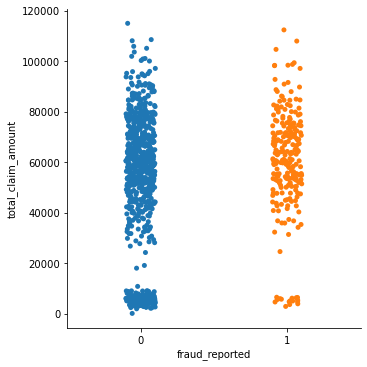

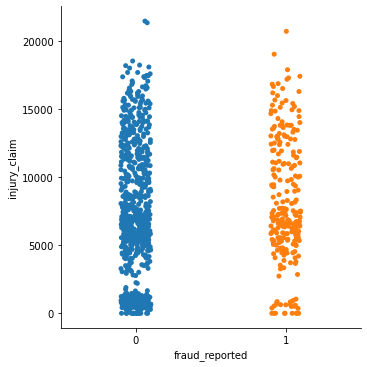

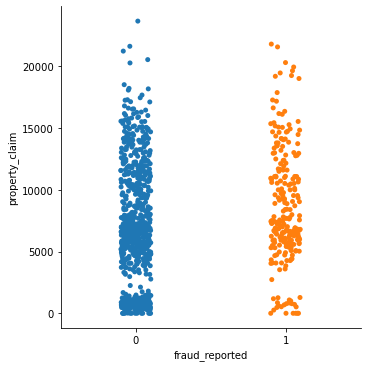

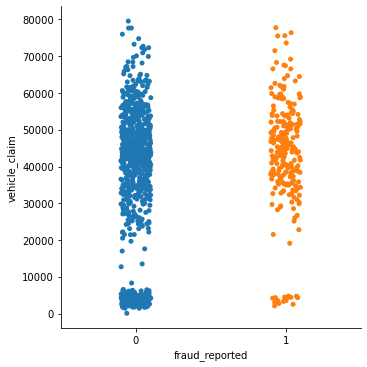

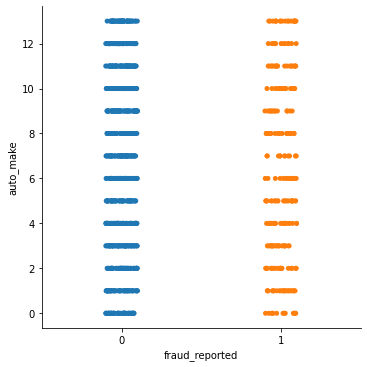

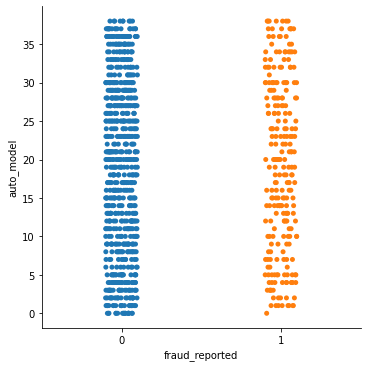

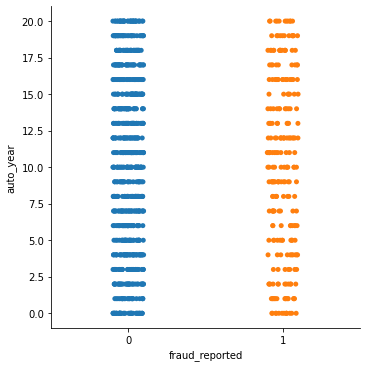

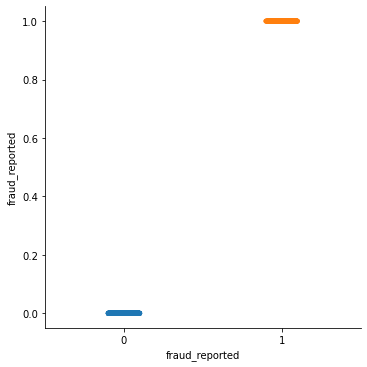

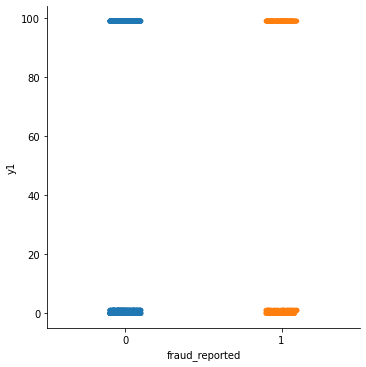

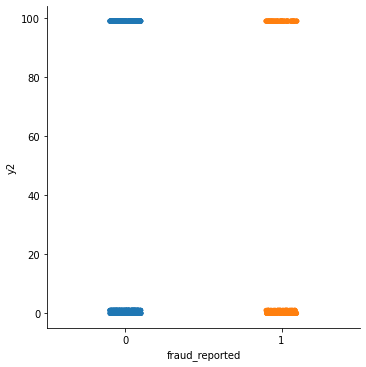

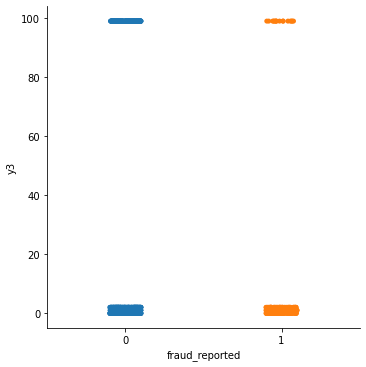

In [41]:
for column in data_le.columns:
    sns.catplot(x="fraud_reported",y=column,data=data_le)
    plt.show()

Obeservations:

- We can see that our target feature fraud_reported has class imbalance in the ratio of 70:30 percent approximately. Therefore we will train our model accordingly.
- All other features are evenly distributed with the exception of Umbrella_limit.
- We also see that the data needs to be scaled and normalized since the data features have vast amount of range.
- All features have small amounts of colinearity with the target variable.

## Scaling continuous data features using Min_Max Scaler

In [42]:
data_le.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,y1,y2,y3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,730889.195000,1.01400,0.951000,0.965000,1256.406150,1.900000,501214.488000,...,7433.420000,7399.570000,37928.950000,6.546000,19.318000,10.103000,0.247000,35.942000,34.271000,18.422000
std,115.113174,9.140287,257063.005276,2687.464969,0.83096,0.804516,0.805247,244.167395,1.917205,71701.610941,...,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,47.318852,46.794714,37.522311
min,0.000000,19.000000,100804.000000,726475.000000,0.00000,0.000000,0.000000,433.330000,0.000000,430104.000000,...,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,728555.000000,0.00000,0.000000,0.000000,1089.607500,1.000000,448404.500000,...,4295.000000,4445.000000,30292.500000,3.000000,10.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,38.000000,533135.000000,730941.500000,1.00000,1.000000,1.000000,1257.200000,1.000000,466445.500000,...,6775.000000,6750.000000,42100.000000,7.000000,20.000000,10.000000,0.000000,1.000000,1.000000,1.000000
75%,276.250000,44.000000,759099.750000,733153.500000,2.00000,2.000000,2.000000,1415.695000,1.000000,603251.000000,...,11305.000000,10885.000000,50822.500000,10.000000,29.000000,15.000000,0.000000,99.000000,99.000000,2.000000
max,479.000000,64.000000,999435.000000,735651.000000,2.00000,2.000000,2.000000,2047.590000,10.000000,620962.000000,...,21450.000000,23670.000000,79560.000000,13.000000,38.000000,20.000000,1.000000,99.000000,99.000000,99.000000


As we can see that min max values for columns vary for columns

In [43]:
scaler = MinMaxScaler()

In [44]:
scaled_features = data_le.columns
data_sca = scaler.fit_transform(data_le)
data_sca = pd.DataFrame(data_sca,columns=scaled_features)

In [45]:
data_sca

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,y1,y2,y3
0,0.684760,0.644444,0.468247,0.986051,1.0,0.5,0.5,0.603112,0.1,0.188769,...,0.303497,0.550063,0.654296,0.769231,0.026316,0.45,1.0,0.010101,0.010101,0.000000
1,0.475992,0.511111,0.269370,0.655405,0.5,0.5,1.0,0.473214,0.5,0.199478,...,0.036364,0.032953,0.043276,0.615385,0.315789,0.60,1.0,1.000000,1.000000,1.000000
2,0.279749,0.222222,0.653098,0.424368,1.0,0.0,1.0,0.606972,0.5,0.002766,...,0.358974,0.162653,0.289722,0.307692,0.789474,0.60,0.0,0.000000,0.000000,0.010101
3,0.534447,0.488889,0.141334,0.014930,0.0,0.5,1.0,0.608582,0.6,0.932699,...,0.295571,0.267850,0.637187,0.230769,0.894737,0.95,1.0,1.000000,0.000000,0.020202
4,0.475992,0.555556,0.296730,0.971556,0.0,1.0,0.5,0.712760,0.6,0.946264,...,0.060606,0.027461,0.056359,0.000000,0.815789,0.70,0.0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.422222,0.935920,0.060375,1.0,1.0,0.5,0.543574,0.1,0.006209,...,0.813054,0.368399,0.767015,0.461538,0.157895,0.55,0.0,0.010101,1.000000,0.020202
996,0.594990,0.488889,0.095846,0.954991,0.0,0.0,0.5,0.621622,0.1,0.933013,...,0.842890,0.763836,0.908919,1.000000,0.736842,1.00,0.0,0.010101,1.000000,0.010101
997,0.271399,0.333333,0.909953,0.521796,1.0,0.5,0.0,0.588604,0.3,0.066505,...,0.349650,0.316857,0.659580,0.846154,0.500000,0.05,0.0,1.000000,0.010101,0.000000
998,0.956159,0.955556,0.481995,0.870096,0.0,1.0,1.0,0.572145,0.5,0.060831,...,0.243357,0.220532,0.458800,0.076923,0.131579,0.15,0.0,1.000000,0.010101,0.010101


## Heat Map

In [46]:
corr_matrix = data_sca.corr()
corr_matrix

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,y1,y2,y3
months_as_customer,1.000000,0.922098,0.057555,-0.048173,-0.000328,-0.026819,0.018481,0.005018,0.017800,0.017895,...,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,-0.006632,-0.052232,-0.043030
age,0.922098,1.000000,0.059413,-0.036941,-0.014533,-0.015185,0.020561,0.014404,0.021924,0.025604,...,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,-0.000785,-0.045421,-0.044510
policy_number,0.057555,0.059413,1.000000,-0.040104,0.072815,0.038917,-0.015058,0.022566,0.011052,0.007083,...,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,-0.028812,-0.023950,0.015509
policy_bind_date,-0.048173,-0.036941,-0.040104,1.000000,-0.005395,-0.017295,-0.052693,0.001027,0.043256,-0.000210,...,0.002270,-0.000009,0.000068,-0.005382,0.025558,0.014101,-0.001254,-0.002358,0.002621,-0.035040
policy_state,-0.000328,-0.014533,0.072815,-0.005395,1.000000,0.001027,0.008213,0.012455,-0.031793,0.008777,...,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,-0.022866,-0.054879,0.000581
policy_csl,-0.026819,-0.015185,0.038917,-0.017295,0.001027,1.000000,0.001986,0.023978,0.022779,0.006879,...,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,0.019620,-0.005789,0.070188
policy_deductable,0.018481,0.020561,-0.015058,-0.052693,0.008213,0.001986,1.000000,0.001624,0.009402,-0.001064,...,0.034352,0.055172,0.000502,-0.030775,-0.003892,0.024921,0.007620,-0.016499,-0.012738,-0.001565
policy_annual_premium,0.005018,0.014404,0.022566,0.001027,0.012455,0.023978,0.001624,1.000000,-0.007334,0.032354,...,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.083617,-0.001530,-0.016961
umbrella_limit,0.017800,0.021924,0.011052,0.043256,-0.031793,0.022779,0.009402,-0.007334,1.000000,0.022119,...,-0.045625,-0.024954,-0.039004,-0.007169,0.042421,0.010528,0.057719,0.022214,0.052933,0.047299
insured_zip,0.017895,0.025604,0.007083,-0.000210,0.008777,0.006879,-0.001064,0.032354,0.022119,1.000000,...,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,-0.079346,0.039954,0.047224


<AxesSubplot:>

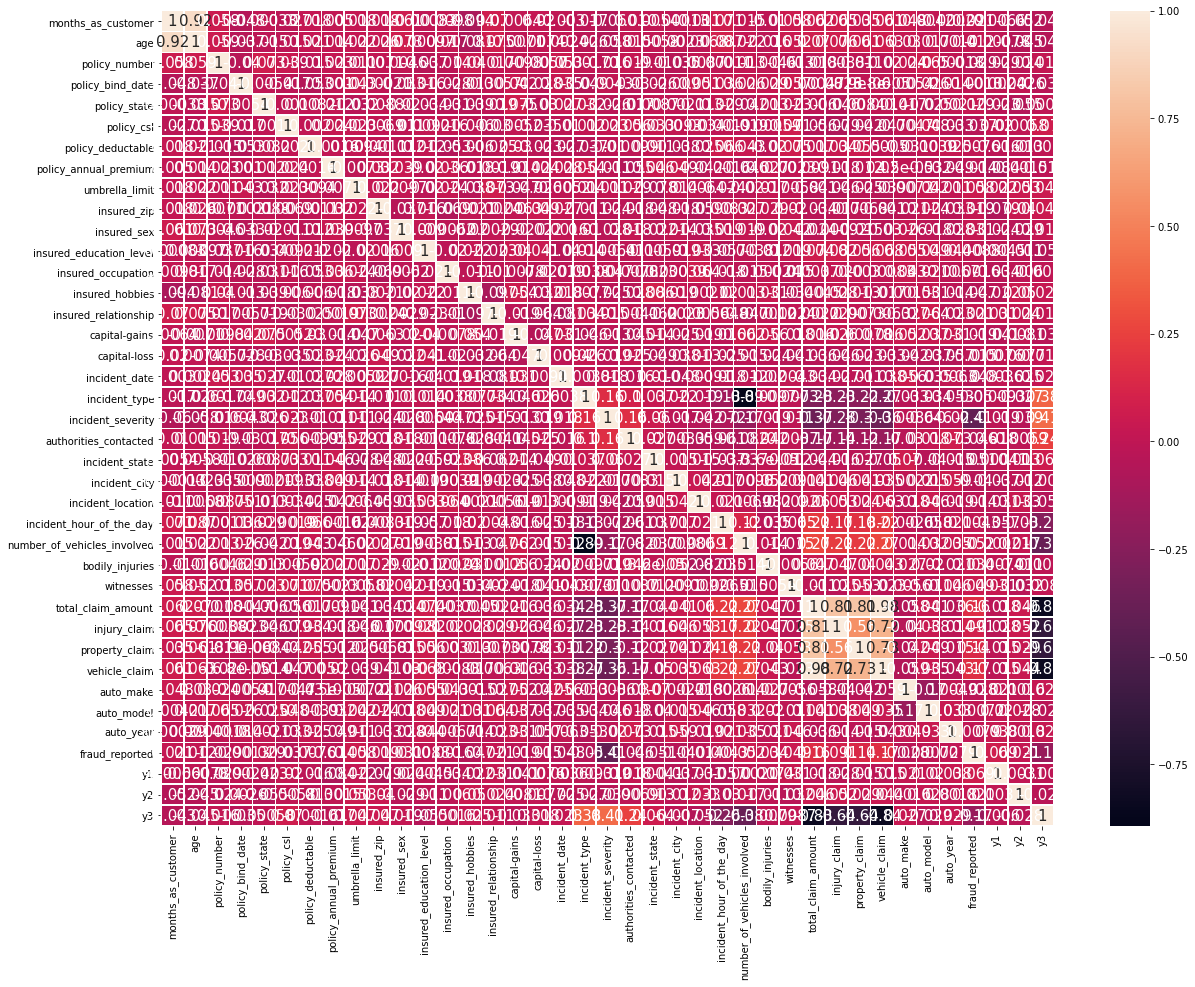

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

## PCA


In [48]:
pca = PCA()

X = data_sca.drop(["fraud_reported"],axis=1)
X_features = X.columns
X = pca.fit_transform(X)
X

array([[ 4.12806775e-02, -6.80214709e-01, -2.34001584e-01, ...,
         1.50537903e-02, -9.96543320e-03,  6.61016581e-17],
       [ 1.25184051e+00, -1.78244416e-01,  6.21401556e-01, ...,
         2.53080471e-02,  1.42776857e-02,  5.91335233e-16],
       [-1.99648638e-01,  2.27557823e-01, -3.05665337e-01, ...,
        -1.29904843e-01, -6.72373509e-02,  3.33349457e-17],
       ...,
       [-3.21502995e-01,  4.03051137e-01,  6.97507038e-01, ...,
         1.01281537e-01,  3.30873483e-02,  2.52631350e-16],
       [ 2.42933013e-01, -5.34558099e-01,  8.72979072e-01, ...,
        -1.80263860e-02,  4.99933163e-02,  1.08802506e-16],
       [ 1.05557171e+00,  6.68902064e-01,  4.31133904e-01, ...,
         3.16825899e-02,  2.77578894e-02,  5.45321936e-17]])

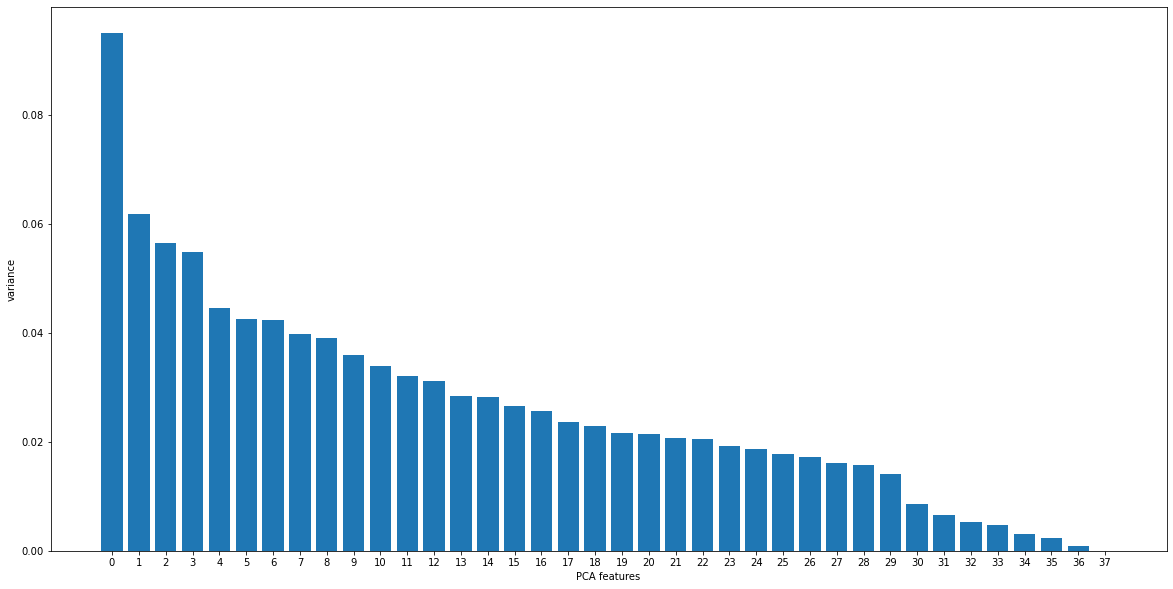

In [49]:
features = range(pca.n_components_)
plt.figure(figsize=(20,10))
plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [50]:
sum = 0
count = 0
for i in pca.explained_variance_ratio_:
    sum += i
    if sum>0.7:
        break
    count+=1
count

16

In [51]:
pca = PCA(n_components=16)

X = data_sca.drop(["fraud_reported"],axis=1)
X_features = X.columns
X = pca.fit_transform(X)
X

array([[ 0.04106167, -0.68023726, -0.23429586, ...,  0.71648523,
         0.28590166,  0.15918699],
       [ 1.25195379, -0.17888542,  0.6198844 , ..., -0.12686494,
        -0.45923367, -0.11009032],
       [-0.19938077,  0.22641777, -0.30668688, ...,  0.72191622,
         0.25727106, -0.4270733 ],
       ...,
       [-0.32151313,  0.40322453,  0.69645141, ...,  0.83820536,
         0.56259924, -0.05460315],
       [ 0.24290594, -0.53477063,  0.87159222, ..., -0.19379919,
         0.73383736,  0.51839207],
       [ 1.05553618,  0.66911973,  0.43104669, ..., -0.10754316,
         0.27559576,  0.5992525 ]])

In [52]:
data_pca = pd.DataFrame(X,columns=["PCA"+str(x) for x in range(16)])
data_pca["Target"] = data_sca["fraud_reported"]
data_pca

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,Target
0,0.041062,-0.680237,-0.234296,-0.320470,0.335039,-0.073814,-0.482811,0.055777,0.015756,-0.326565,-0.055957,0.116241,-0.628733,0.716485,0.285902,0.159187,1.0
1,1.251954,-0.178885,0.619884,0.848770,-0.037478,0.516034,-0.178781,-0.058509,-0.260213,-0.451976,0.060339,-0.392961,-0.285495,-0.126865,-0.459234,-0.110090,1.0
2,-0.199381,0.226418,-0.306687,-0.638253,-0.428991,-0.226174,-0.376054,-0.216827,-0.643610,-0.098848,0.610916,0.398240,0.419353,0.721916,0.257271,-0.427073,0.0
3,0.065785,0.489202,0.595428,-0.307414,-0.109960,0.228488,0.164792,0.730422,-0.578016,0.781239,0.463565,-0.096466,-0.539547,0.161626,0.183670,-0.611362,1.0
4,1.132647,-0.616515,-0.296590,0.033441,-0.333129,0.370471,0.339283,0.240653,0.239419,1.028407,0.140467,-0.421752,0.251509,-0.162921,0.278576,0.313455,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.315334,0.490444,-0.474679,0.339334,0.589194,0.578083,-0.481365,0.235728,0.510320,0.008619,0.379037,-0.375286,0.252765,0.189212,-0.131959,0.034510,0.0
996,-0.763354,0.552794,-0.520304,0.562723,0.582646,-0.273708,0.159191,0.653681,-0.550139,0.420802,-0.459076,0.765772,-0.276060,0.095572,0.181212,-0.498875,0.0
997,-0.321513,0.403225,0.696451,-0.620227,-0.120507,-0.645913,-0.370975,-0.396207,0.194084,0.224850,0.340422,0.302816,0.083783,0.838205,0.562599,-0.054603,0.0
998,0.242906,-0.534771,0.871592,-0.092808,-0.001106,0.691408,0.247500,0.576201,-0.014319,0.398756,0.551857,-0.499129,0.293484,-0.193799,0.733837,0.518392,0.0


## Splitting training and testing dataset

In [53]:
X=data_pca.drop("Target",axis=1)
y=data_pca["Target"]

Using the pca dataset causes information loss and gives lower accuracy score therefore we'll use scaled data in our model.

In [54]:
X=data_sca.drop("fraud_reported",axis=1)
y=data_sca["fraud_reported"]

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

## Modelling data into classification models

Since we have binary class in our target column we will use binary classification models like:
- Logistic Regression
- k-Nearest Neighbors
- Decision Trees
- Support Vector Machine
- Naive Bayes

### Logistic Regression

In [56]:
lg = LogisticRegression()

In [57]:
lg.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_pred = lg.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
print(lg.score(X_train,y_train))
lg.score(X_test,y_test)

0.7925


0.77

In [60]:
f1_score(y_test, y_pred, average='weighted')

0.7389350649350648

In [61]:
accuracy_score(y_test, y_pred)

0.77

In [62]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[142,  11],
       [ 35,  12]])

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       153
         1.0       0.52      0.26      0.34        47

    accuracy                           0.77       200
   macro avg       0.66      0.59      0.60       200
weighted avg       0.74      0.77      0.74       200



In [64]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=42)
scores_lg = (cross_val_score(lg, X, y,scoring="f1", cv=k_fold))
scores_lg

array([0.36190476, 0.44859813, 0.40425532, 0.28571429])

In [65]:
print(np.mean(scores_lg),np.std(scores_lg))

0.3751181244022764 0.06003317163159979


In [66]:
roc_auc_score(y_test, y_pred)

0.5917118620497845

### Decision Tree Classifier

In [135]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(X_train, y_train)
    y_pred = DTC.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    if score>score_max:
        score_max = score
        index = i
print (score_max)
index

0.8387803500846978


96

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [137]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [138]:
y_pred = DTC.predict(X_test)
y_pred

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [139]:
print(DTC.score(X_train,y_train))
DTC.score(X_test,y_test)

1.0


0.84

In [140]:
dtc_f1 = f1_score(y_test, y_pred, average='weighted')
dtc_f1

0.8387803500846978

In [141]:
accuracy_score(y_test, y_pred)

0.84

In [142]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[138,  15],
       [ 17,  30]])

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       153
         1.0       0.67      0.64      0.65        47

    accuracy                           0.84       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.84      0.84      0.84       200



In [144]:
roc_auc_score(y_test, y_pred)

0.7701293283270755

### KNN Classifier

In [77]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    if score>score_max:
        score_max = score
        index = i
print (score_max)
index

0.7883705357142857


20

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
y_pred = knn.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
knn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_f1

0.7883705357142857

In [82]:
print(knn.score(X_train,y_train))
knn.score(X_test,y_test)

0.77375


0.81

In [83]:
accuracy_score(y_test, y_pred)

0.81

In [84]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[149,  10],
       [ 28,  13]])

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       159
         1.0       0.57      0.32      0.41        41

    accuracy                           0.81       200
   macro avg       0.70      0.63      0.65       200
weighted avg       0.79      0.81      0.79       200



In [86]:
roc_auc_score(y_test, y_pred)

0.6270900444853506

### Support Vector Machine Classifier

In [87]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    if score>score_max:
        score_max = score
        index = i
print (score_max)
index

0.7638671089119679


16

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=40)

In [89]:
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)    

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [90]:
y_pred = svc.predict(X_test)
y_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [91]:
rfc_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_f1

0.59375

In [92]:
print(svc.score(X_train,y_train))
svc.score(X_test,y_test)

0.89125


0.7

In [93]:
accuracy_score(y_test, y_pred)

0.7

In [94]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[138,   2],
       [ 58,   2]])

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       140
         1.0       0.50      0.03      0.06        60

    accuracy                           0.70       200
   macro avg       0.60      0.51      0.44       200
weighted avg       0.64      0.70      0.59       200



In [96]:
roc_auc_score(y_test, y_pred)

0.5095238095238096

### Gaussian Naive Bayes Classification

In [97]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=i)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    if score>score_max:
        score_max = score
        index = i
print (score_max)
index

0.7690476190476191


13

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=index)

In [99]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [100]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.])

In [101]:
gnb_f1 = f1_score(y_test, y_pred, average='weighted')
gnb_f1

0.7690476190476191

In [102]:
print(gnb.score(X_train,y_train))
gnb.score(X_test,y_test)

0.7025


0.75

In [103]:
accuracy_score(y_test, y_pred)

0.75

In [104]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[115,  41],
       [  9,  35]])

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82       156
         1.0       0.46      0.80      0.58        44

    accuracy                           0.75       200
   macro avg       0.69      0.77      0.70       200
weighted avg       0.82      0.75      0.77       200



In [106]:
roc_auc_score(y_test, y_pred)

0.7663170163170163

From the above models we can find the highest f1 score among these models. From our observation we can see that Decision Tree Classisifer has the highest f1 score and also the best roc_auc_score among all the models. 

The f1 score bias between the classes is lowest for Decision Tree Classifier.

Also, the model fits the best for Decision Tree Classifier.

## Using hyperparameters on Decision Tree Classification model to improve accuracy.

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=96)

In [160]:
clf = DecisionTreeClassifier()

In [161]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [162]:
grid_params = {
    'max_depth': list(range(40)),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'max_features': list(range(40)),
}

We will use three hyperparamters- n-neighbors, weights and metric.

- n_neighbors: Decide the best k based on the values we have computed earlier.
- leaf_size :
- weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
- metric: The distance metric to be used will calculating the similarity.

In [163]:
gnb_grid = GridSearchCV(estimator=clf, param_grid=grid_params, cv=4, n_jobs=-1, verbose=1, scoring = "f1")
gnb_grid.fit(X_train, y_train)
print(gnb_grid.best_estimator_)

Fitting 4 folds for each of 16000 candidates, totalling 64000 fits
DecisionTreeClassifier(max_depth=3, max_features=34, min_samples_leaf=5)


/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4720 fits failed out of a total of 64000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1600 fits failed with the following error:
Traceback (most recent call last):
  File "/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/osux/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError

In [164]:
dtc_final = gnb_grid.best_estimator_

In [165]:
dtc_final.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=34, min_samples_leaf=5)

In [166]:
y_pred = dtc_final.predict(X_test)
y_pred

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.])

In [167]:
f1_score(y_test, y_pred, average='weighted')

0.8808552631578946

In [168]:
print(dtc_final.score(X_train,y_train))
dtc_final.score(X_test,y_test)

0.85875


0.88

In [169]:
accuracy_score(y_test, y_pred)

0.88

In [170]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[140,  13],
       [ 11,  36]])

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       153
         1.0       0.73      0.77      0.75        47

    accuracy                           0.88       200
   macro avg       0.83      0.84      0.84       200
weighted avg       0.88      0.88      0.88       200



In [173]:
roc_auc_score(y_test, y_pred)

0.8404950632735364

## AUC ROC Curve:

In [176]:
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

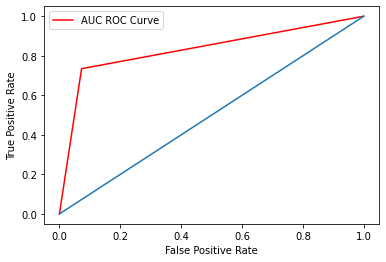

In [179]:
plt.plot(fpr,tpr,color='red',label="AUC ROC Curve")
plt.plot([0,1],[0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Saving the most efficient model in a pickle file

In [121]:
final_model1 = open('Project10_final_prediction.csv', 'ab')     
pickle.dump(dtc_final, final_model1)                     
final_model1.close() 